# Predict survival on the Titanic

In [1]:
#import libraries for data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read train data using pandas
train = pd.read_csv('train.csv',index_col = 'PassengerId')

# Read test data using pandas
test = pd.read_csv('test.csv',index_col = 'PassengerId')

full_data = pd.concat([train.drop('Survived',axis=1),test],axis = 0,sort = False)

In [3]:
# check the first 5 rows
full_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#cheaking for null
train[train['Embarked'].isnull() == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Data Visualization

### Use heatmap to check for missing values.

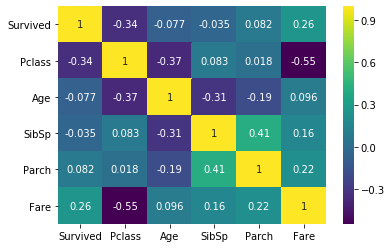

In [5]:
sns.heatmap(train.corr(), annot=True,cmap = 'viridis')

In [6]:
def missing_values(data, cmap = 'viridis'):
    """
    Given the data, this function will return a graph for missing values
    
    Parameters
    ----------
    data : Pandas dataframe.
    cmap : matplotlib colormap name or object, or list of colors, optional
    The mapping from data values to color space. If not provided, the
    default is 'viridis'.
    
    """
    return sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

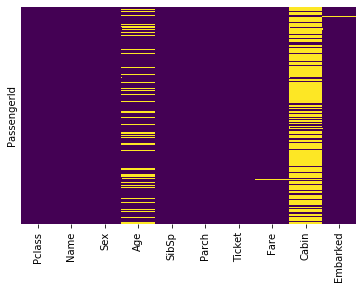

In [7]:
missing_values(full_data)

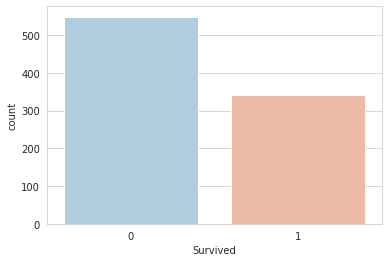

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

### Check the ratio for male and female who survived

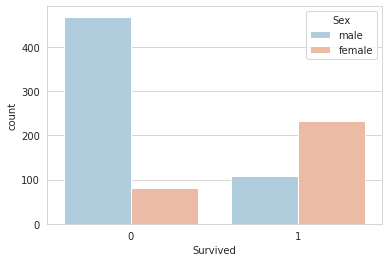

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

### In terms of class

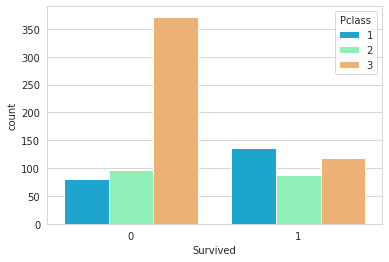

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

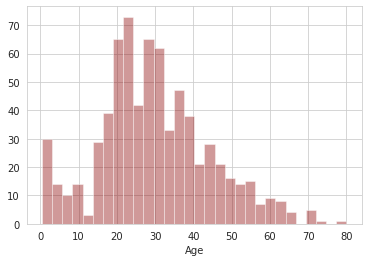

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

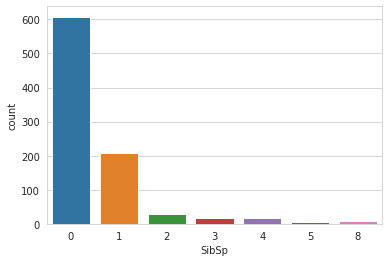

In [12]:
sns.countplot(x='SibSp',data=train)

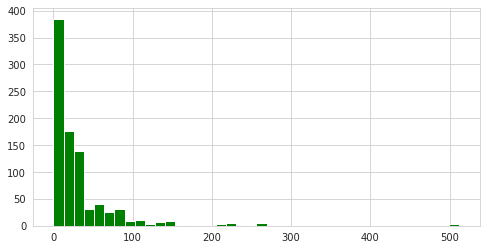

In [13]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))


### How many unique tickets are there?

In [14]:
full_data['Ticket'].nunique()

929

### Create a new feature with the titles

In [15]:
full_data['title'] = full_data['Name'].apply(lambda myString: myString[myString.find(",")+2:myString.find(".")])


In [16]:
full_data['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Sir               1
Jonkheer          1
Don               1
Lady              1
Capt              1
the Countess      1
Mme               1
Dona              1
Name: title, dtype: int64

## Data Cleaning

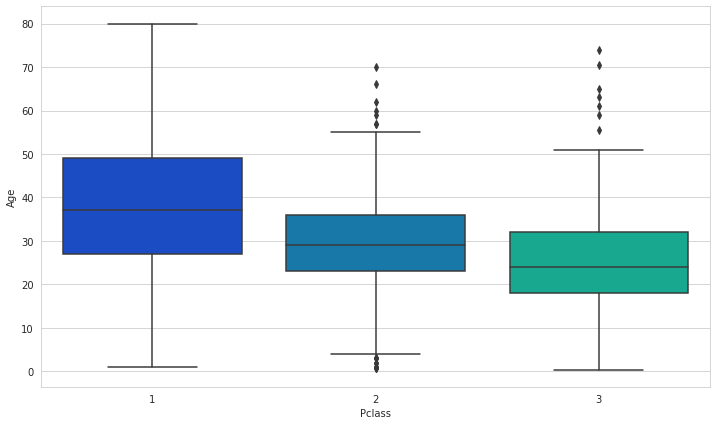

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [19]:
full_data['Age'] = full_data[['Age','Pclass']].apply(impute_age,axis=1)


### Let's check the heatmap again

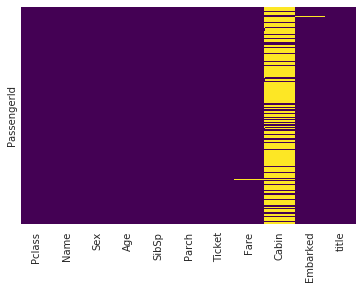

In [20]:
missing_values(full_data)

### Let's  convert categorical features to dummy variables using pandas! 

**There are so many missing values in "cabin" column, that it's better to drop it**

In [21]:
full_data.drop('Cabin',axis=1,inplace=True)


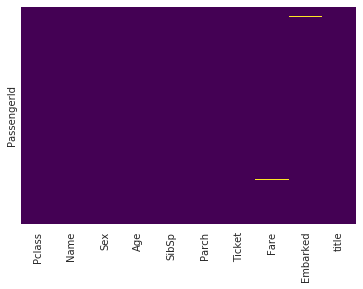

In [22]:
#checking for the missing values again
missing_values(full_data)

In [23]:
full_data[full_data['Fare'].isna() == True] = full_data['Fare'].mean()

In [24]:
full_data[full_data['Embarked'].isna() == True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
PassengerId,,,,,,,,,,
62,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,NaN,Miss
830,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,NaN,Mrs


In [25]:
full_data["Embarked"] = full_data["Embarked"].fillna('C')

In [26]:
sex = pd.get_dummies(full_data['Sex'],drop_first=True)
embark = pd.get_dummies(full_data['Embarked'],drop_first=True)
title = pd.get_dummies(full_data['title'],drop_first=True)

In [27]:
#drop the categorical features
full_data.drop(['Sex','Embarked','Name','Ticket','title'],axis=1,inplace=True)


In [28]:
# replace them with the nummeric features 
full_data = pd.concat([full_data,sex,embark,title],axis=1)

In [29]:
full_data.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3.0,22.0,1.0,0.0,7.2500,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1.0,38.0,1.0,0.0,71.2833,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3.0,26.0,0.0,0.0,7.9250,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1.0,35.0,1.0,0.0,53.1000,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,3.0,35.0,0.0,0.0,8.0500,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [30]:
#split train and test again
def split_data(data,nrow):
    """
    split data along the row
    
    Paranmeters
    --------------
    data : pandas dataframe
    nrow : split 
    
    Returns
    --------------
    Tuple of top and bottom part of the data
    """
    top = data.iloc[:nrow]
    bottom = data.iloc[nrow:]
    return (top,bottom)


train_new,test_new = split_data(full_data,nrow = 891)

In [31]:
train_new.shape,test.shape, full_data.shape

((891, 28), (418, 10), (1309, 28))

In [32]:
correlation = pd.concat([train["Survived"],train_new],axis = 1).corr()
print(correlation['Survived'])

Survived        1.000000
Pclass         -0.338481
Age            -0.047255
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
female          0.543351
male           -0.543351
C               0.174718
Q               0.003650
S              -0.155660
Capt           -0.026456
Col             0.011329
Don            -0.026456
Dona                 NaN
Dr              0.008185
Jonkheer       -0.026456
Lady            0.042470
Major           0.011329
Master          0.085221
Miss            0.327093
Mlle            0.060095
Mme             0.042470
Mr             -0.549199
Mrs             0.339040
Ms              0.042470
Rev            -0.064988
Sir             0.042470
the Countess    0.042470
Name: Survived, dtype: float64


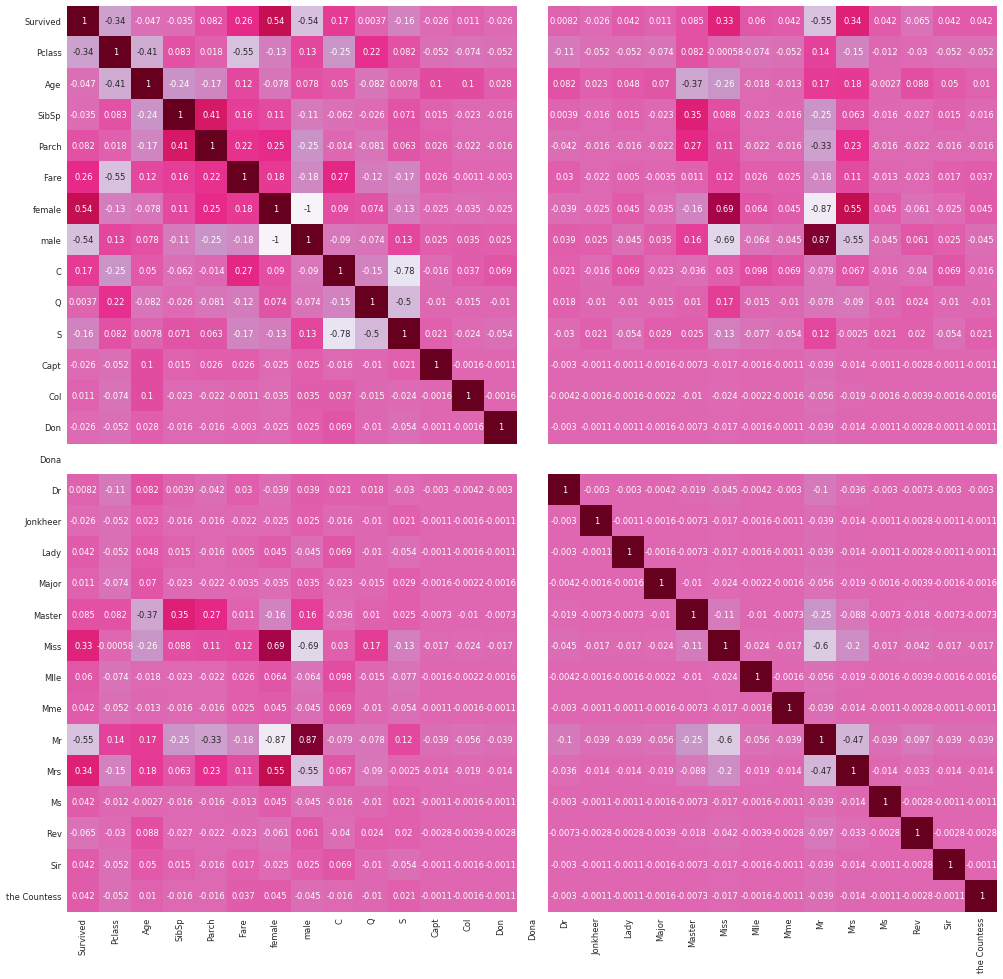

In [33]:
plt.figure(figsize = (20,20),dpi = 60)
sns.heatmap(pd.concat([train["Survived"],train_new],axis = 1).corr(), annot=True,cmap = 'PuRd',cbar=False)

## Building models
**We will be testing Logistic regression and Random forest for now. More models can be used depending on the accuracy**

In [34]:
#import libraries

from sklearn.model_selection import train_test_split #for train test split
#We can check precision,recall,f1-score using classification report!
from sklearn.metrics import classification_report,accuracy_score

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Train Test split

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(train_new, 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=142)


In [36]:
y_train.shape

(623,)

In [37]:
import tensorflow as tf
from tensorflow import keras

In [102]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 473us/sample - loss: 0.9454 - acc: 0.6388 - val_loss: 0.7740 - val_acc: 0.6903
Epoch 2/30
623/623 [==============================] - 0s 90us/sample - loss: 0.7609 - acc: 0.6533 - val_loss: 0.8057 - val_acc: 0.6231
Epoch 3/30
623/623 [==============================] - 0s 77us/sample - loss: 0.6811 - acc: 0.6709 - val_loss: 0.5209 - val_acc: 0.7985
Epoch 4/30
623/623 [==============================] - 0s 81us/sample - loss: 0.5260 - acc: 0.7560 - val_loss: 0.4748 - val_acc: 0.8022
Epoch 5/30
623/623 [==============================] - 0s 77us/sample - loss: 0.5017 - acc: 0.7624 - val_loss: 0.4625 - val_acc: 0.8097
Epoch 6/30
623/623 [==============================] - 0s 73us/sample - loss: 0.4978 - acc: 0.7737 - val_loss: 0.4355 - val_acc: 0.8060
Epoch 7/30
623/623 [==============================] - 0s 68us/sample - loss: 0.4900 - acc: 0.7865 - val_loss: 0.4548 - val_acc: 0.8134
Epoch 8/

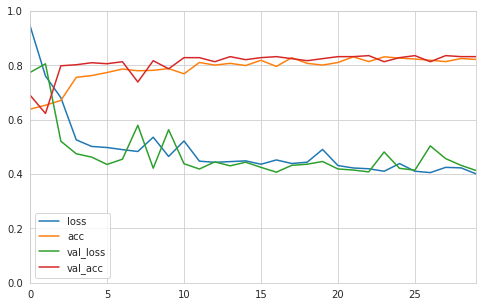

In [103]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [86]:
predict_final = np.round(model.predict(test_new))
predict_final.shape

(418, 1)

In [87]:
submission = pd.DataFrame(
    { 
        'PassengerId': test_new.index, 
        'Survived': predict_final.ravel()
    }
)
submission.to_csv("submission_final.csv", index=False)